# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). At the very bottom of the notebook, you'll find some unit tests to check the correctness of your neural network. Be sure to run these before you submit your project.

After you've submitted this project, feel free to explore the data and the model more.



In [155]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [156]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides_original = pd.read_csv(data_path)
rides = rides_original

In [157]:
rides.head(30)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

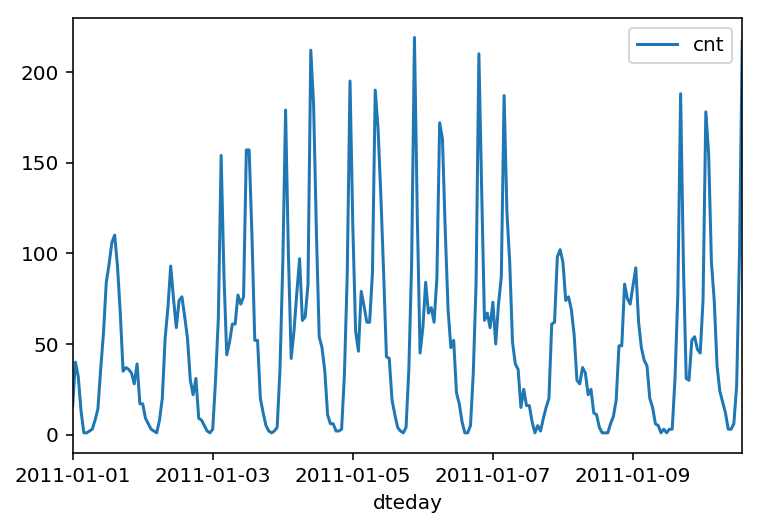

In [158]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [159]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [160]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [161]:
scaled_features

{'casual': [35.676218424535357, 49.30503038705308],
 'cnt': [189.46308763450142, 181.38759909186473],
 'hum': [0.6272288394038783, 0.19292983406291508],
 'registered': [153.78686920996606, 151.35728591258314],
 'temp': [0.4969871684216583, 0.19255612124972191],
 'windspeed': [0.1900976063064618, 0.12234022857279049]}

### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [162]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. It's important to split the data randomly so all cases are represented in both sets.

In [163]:
n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
val_features, val_targets = features.drop(split), targets.drop(split)

## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. . You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [164]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, 
                                                size=(self.hidden_nodes, self.input_nodes))
#         print('self.weights_input_to_hidden: ' + str(self.weights_input_to_hidden.shape))
    
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.output_nodes, self.hidden_nodes))
#         print('self.weights_hidden_to_output: ' + str(self.weights_hidden_to_output.shape))
        
        self.learning_rate = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # TODO: Activation function is the sigmoid function
        self.activation_function = lambda x: 1.0/(1 + np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot( self.weights_input_to_hidden, inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
#         output_grad = -final_inputs*1
        
        # TODO: Backpropagated error
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)   # errors propagated to the hidden layer
        hidden_grad = hidden_errors * hidden_outputs * (1-hidden_outputs)  # hidden layer gradients
        
        # TODO: Update the weights
        self.weights_hidden_to_output += self.learning_rate * output_errors * hidden_outputs.T # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.learning_rate * hidden_grad  *inputs.T   # update input-to-hidden weights with gradient descent step
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden,inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs

In [165]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training the network

Here you'll set the hyperparameters for the network. You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network faster. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. However, it can become too specific to the training set and will fail to generalize to the validation set. This is called overfitting. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.

In [166]:
### Set the hyperparameters here ###
epochs = 5000
learning_rate = 0.001
hidden_nodes = 50
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Validation loss: {:.4f}'.format(val_loss))
        

Training loss: 1.6057
Validation loss: 1.5484
Training loss: 0.3219
Validation loss: 0.3096
Training loss: 0.3100
Validation loss: 0.2998
Training loss: 0.3112
Validation loss: 0.3002
Training loss: 0.2920
Validation loss: 0.2820
Training loss: 0.2860
Validation loss: 0.2742
Training loss: 0.2732
Validation loss: 0.2592
Training loss: 0.2725
Validation loss: 0.2581
Training loss: 0.2559
Validation loss: 0.2422
Training loss: 0.2474
Validation loss: 0.2319


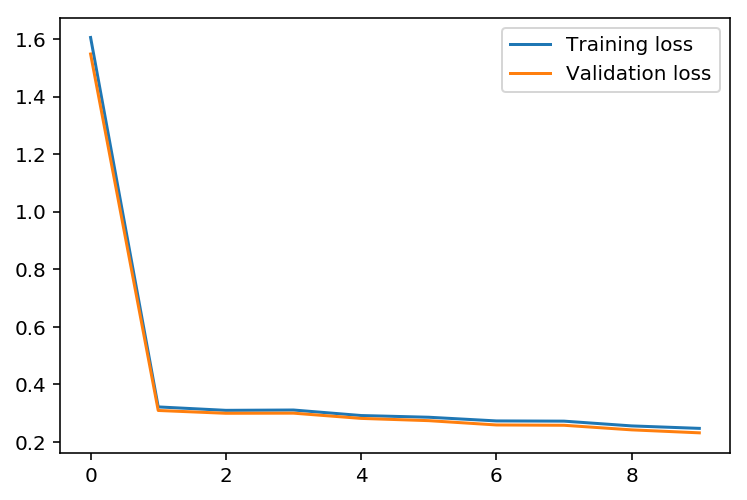

In [167]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()

## Check out your predictions

Here, use the test data to check that network is accurately making predictions. If your predictions don't match the data, try adjusting the hyperparameters and check to make sure the forward passes in the network are correct.

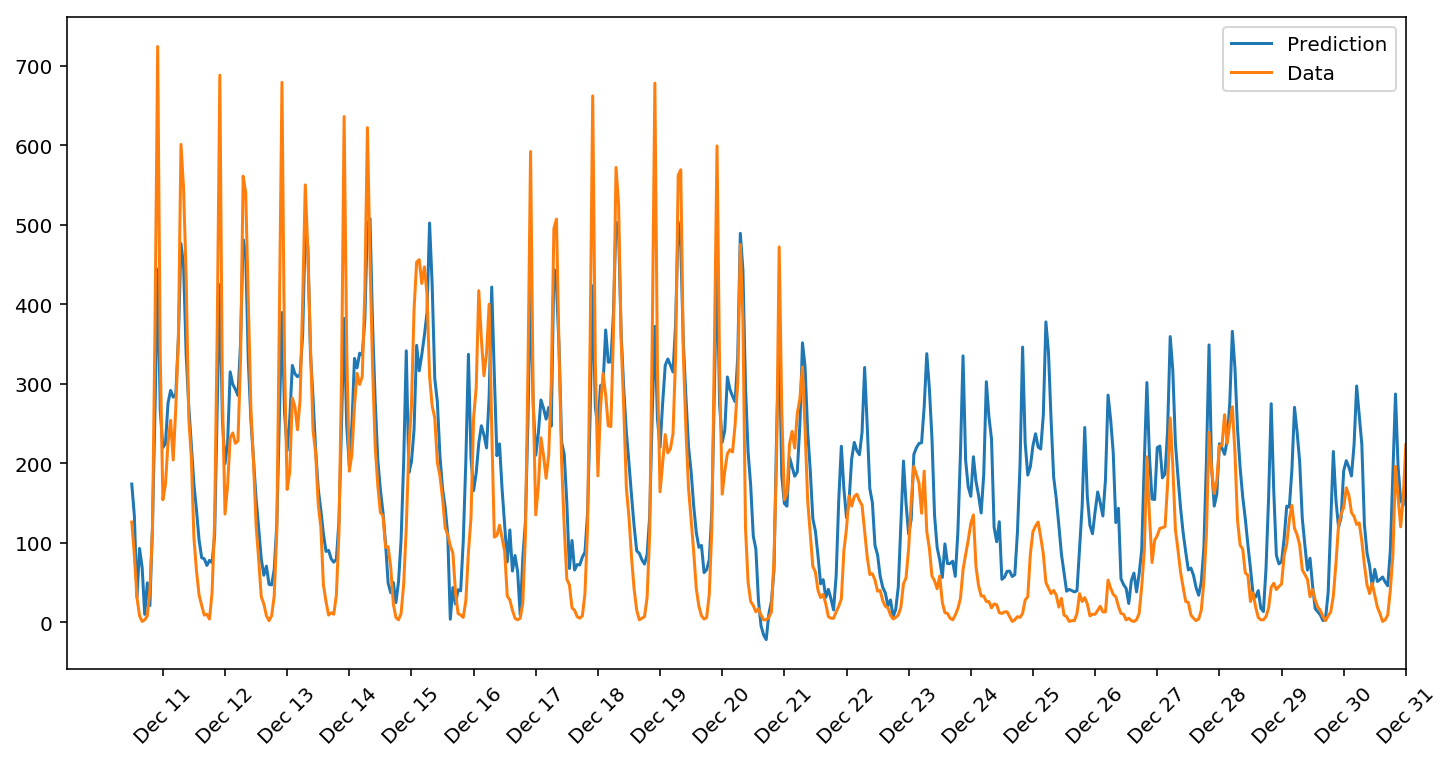

In [168]:
fig, ax = plt.subplots(figsize=(12,6))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below

It fails near Christmas and New Year (22nd - 31st Dec), as it tends to overestimate the count during the festival period. I think the overestimate was due to the fact that the their are no features containing information about festival like Christmas (it has flag for holiday and day of week, but no day of month). 

As during festival period people might perfer something else (e.g. spending time with family at home) to biking, which would make Christmas period more likely to have smaller count than the other period given other factors the same. The absence of the festival dummy variable could therefore lead to overestimation of count during long holiday period like Christmas, as the model fails to distinguish between festival vs non-festival.

I tried out adding features (4 scenario) to account for days and the festivals below.

0. Original [Training loss: 0.2474]

0. Add day as feature (dummize) [Training loss: 0.1781]
0. Add day as feature, (not dummize) [Training loss: 0.1504]
0. Add holiday as feature [Training loss: 0.1417]
0. Add holiday & day (dummize) as feature [Training loss: 0.1613]


It seems that **Add holiday as feature** has the lowest loss amount the four, while **Add day as a feature, (not dummize)** has a little bit higher loss but it has more accurate prediction on during the Christmas period. I think **Add day as a feature, (not dummize)** has higher accuracy during Christmas period because it accounts for the days near the Christmas as well, but it might overfit when it generalize the day (say 25th and 26th that are not in Dec) to other month. **Add holiday as feature** doesn't fit as accurate as **Add day as a feature, (not dummize)** during the Christmas period, but it has lower loss as a whole and it might due to the fact that holiday tags are less prone to the overfit problem mentioned.

## Unit tests

Run these unit tests to check the correctness of your network implementation. These tests must all be successful to pass the project.

In [169]:
import unittest

np.random.seed(42)
inputs = [0.5, -0.2, 0.1]
targets = [0.4]

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path == 'Bike-Sharing-Dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.train(inputs, targets)
#         print('network.weights_hidden_to_output: '+ str(network.weights_hidden_to_output))
#         print('network.weights_input_to_hidden: '+ str(network.weights_input_to_hidden))

        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    [ 0.22931895, -1.28754157]))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    [[-0.7128223, 0.22086344, -0.64139849],
                                     [-1.06444693, 1.06268915, -0.17280743]]))
        

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        self.assertTrue(np.allclose(network.run(inputs), -0.97900982))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.017s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Proposed Enhancement

#### Add day as a feature (dummize)

Training loss: 1.5663
Validation loss: 1.5725
Training loss: 0.3086
Validation loss: 0.3194
Training loss: 0.2886
Validation loss: 0.3036
Training loss: 0.2795
Validation loss: 0.2918
Training loss: 0.2695
Validation loss: 0.2823
Training loss: 0.2608
Validation loss: 0.2721
Training loss: 0.2452
Validation loss: 0.2581
Training loss: 0.2255
Validation loss: 0.2380
Training loss: 0.2031
Validation loss: 0.2169
Training loss: 0.1781
Validation loss: 0.1906


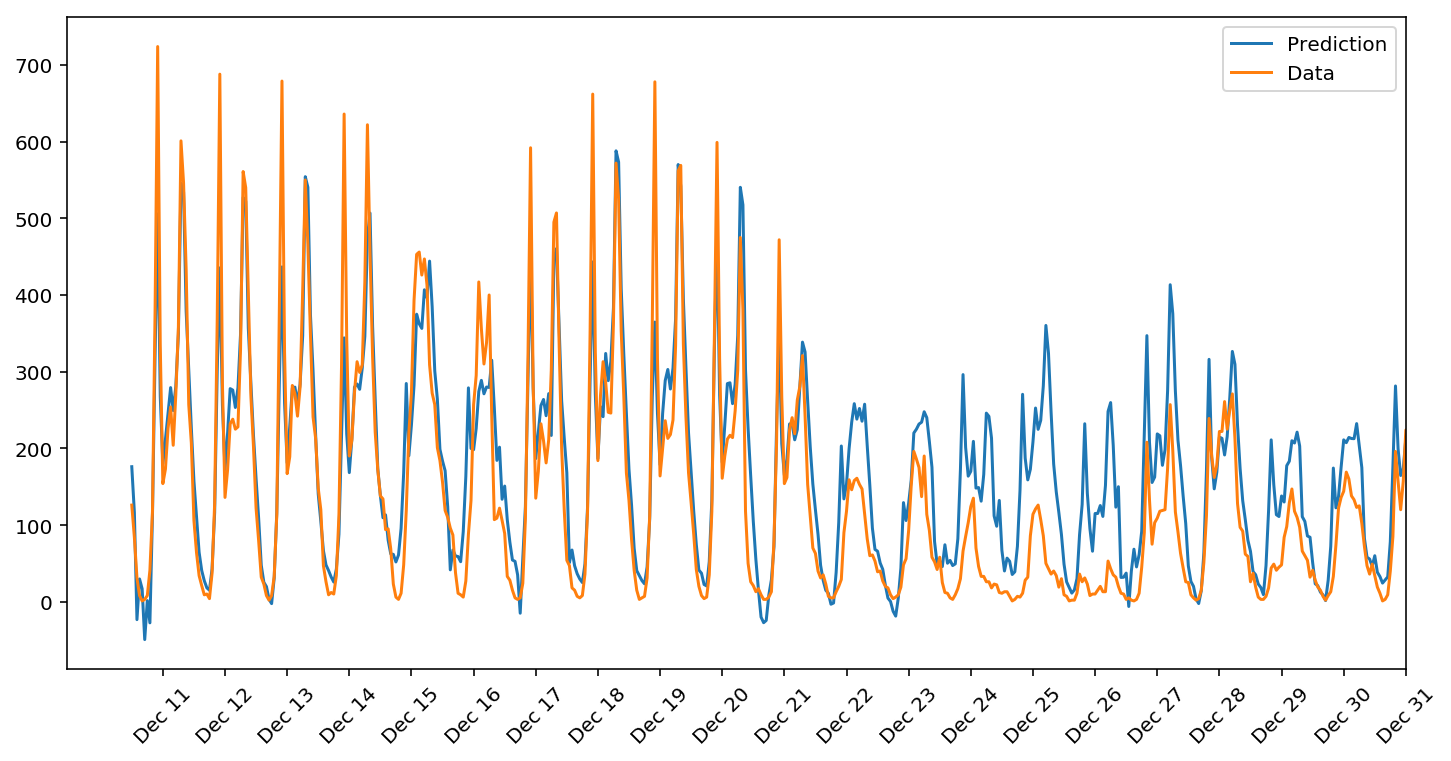

In [170]:
rides = rides_original
rides['day'] =  rides['dteday'].apply(lambda x: pd.datetime.strptime(x,'%Y-%m-%d').day)
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday', 'day']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'day']
data = rides.drop(fields_to_drop, axis=1)

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
val_features, val_targets = features.drop(split), targets.drop(split)


### Set the hyperparameters here ###
# epochs = 2000
# learning_rate = 0.005
# hidden_nodes = 50
# output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Validation loss: {:.4f}'.format(val_loss))

fig, ax = plt.subplots(figsize=(12,6))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

#### Add day as a feature, (not dummize)

Training loss: 1.2730
Validation loss: 1.1767
Training loss: 0.3153
Validation loss: 0.3109
Training loss: 0.3738
Validation loss: 0.3608
Training loss: 0.2869
Validation loss: 0.2813
Training loss: 0.2715
Validation loss: 0.2744
Training loss: 0.2267
Validation loss: 0.2269
Training loss: 0.2250
Validation loss: 0.2218
Training loss: 0.2144
Validation loss: 0.2192
Training loss: 0.1710
Validation loss: 0.1742
Training loss: 0.1504
Validation loss: 0.1549


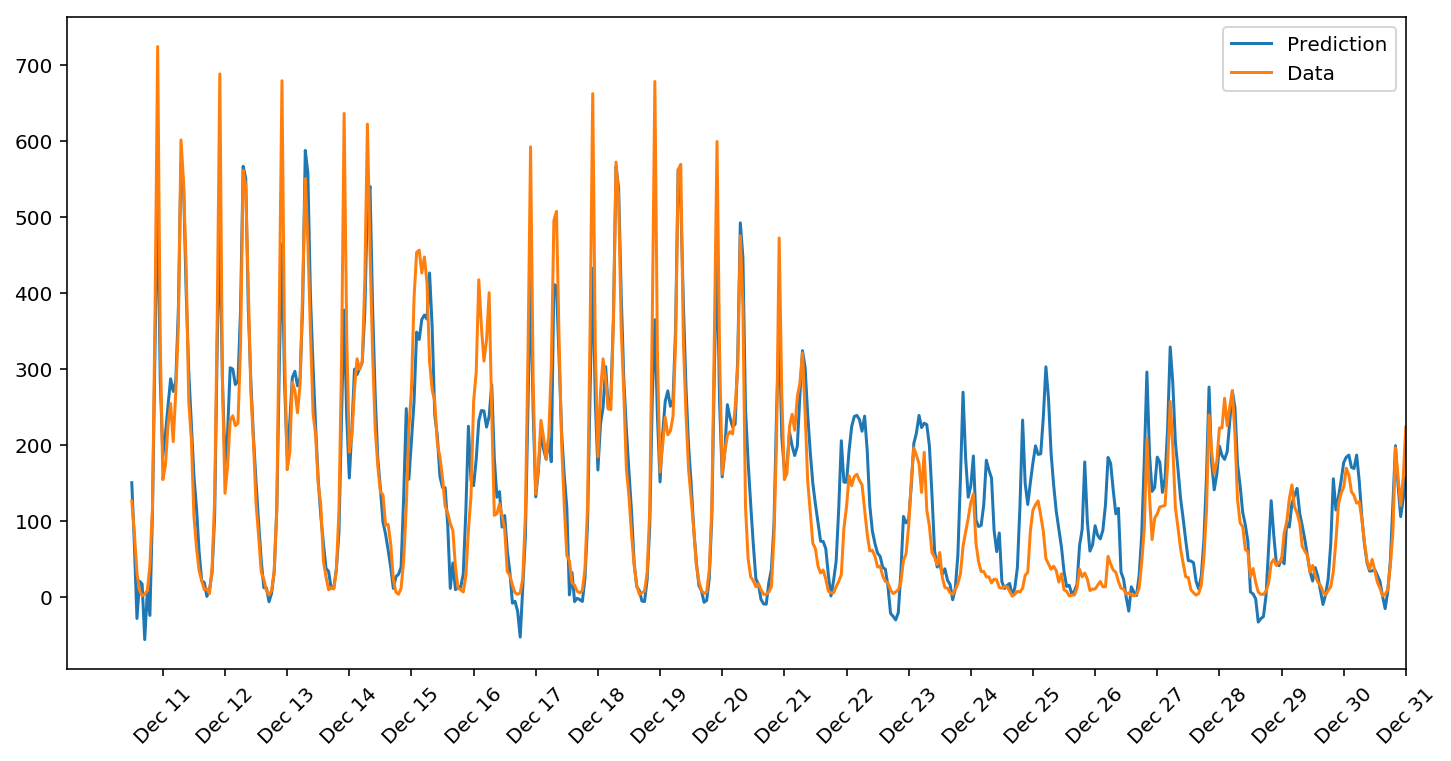

In [171]:
rides = rides_original
rides['day'] =  rides['dteday'].apply(lambda x: pd.datetime.strptime(x,'%Y-%m-%d').day)
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
val_features, val_targets = features.drop(split), targets.drop(split)


### Set the hyperparameters here ###
# epochs = 2000
# learning_rate = 0.005
# hidden_nodes = 50
# output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Validation loss: {:.4f}'.format(val_loss))

fig, ax = plt.subplots(figsize=(12,6))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

#### Add holiday as feature

In [172]:
# https://pypi.python.org/pypi/holidays/0.7
import holidays
hlday = holidays.US(state='WA', years=[2011,2012,2010])
hlday_obj = {'dates': [d.isoformat() for d in list(hlday.keys())], 'holiday_name': list(hlday.values())}
df_hlday = pd.DataFrame(data=hlday_obj, columns=hlday_obj.keys())
df_hlday

,dates,holiday_name
0,2010-01-01,New Year's Day
1,2010-12-31,New Year's Day (Observed)
2,2010-01-18,"Martin Luther King, Jr. Day"
3,2010-02-15,Washington's Birthday
4,2010-05-31,Memorial Day
5,2010-07-04,Independence Day
6,2010-07-05,Independence Day (Observed)
7,2010-09-06,Labor Day
8,2010-10-11,Columbus Day
9,2010-11-11,Veterans Day


Training loss: 2.0674
Validation loss: 2.0701
Training loss: 0.3187
Validation loss: 0.3117
Training loss: 0.2840
Validation loss: 0.2776
Training loss: 0.2623
Validation loss: 0.2555
Training loss: 0.2382
Validation loss: 0.2327
Training loss: 0.2131
Validation loss: 0.2100
Training loss: 0.2007
Validation loss: 0.1960
Training loss: 0.1821
Validation loss: 0.1799
Training loss: 0.1582
Validation loss: 0.1576
Training loss: 0.1417
Validation loss: 0.1408


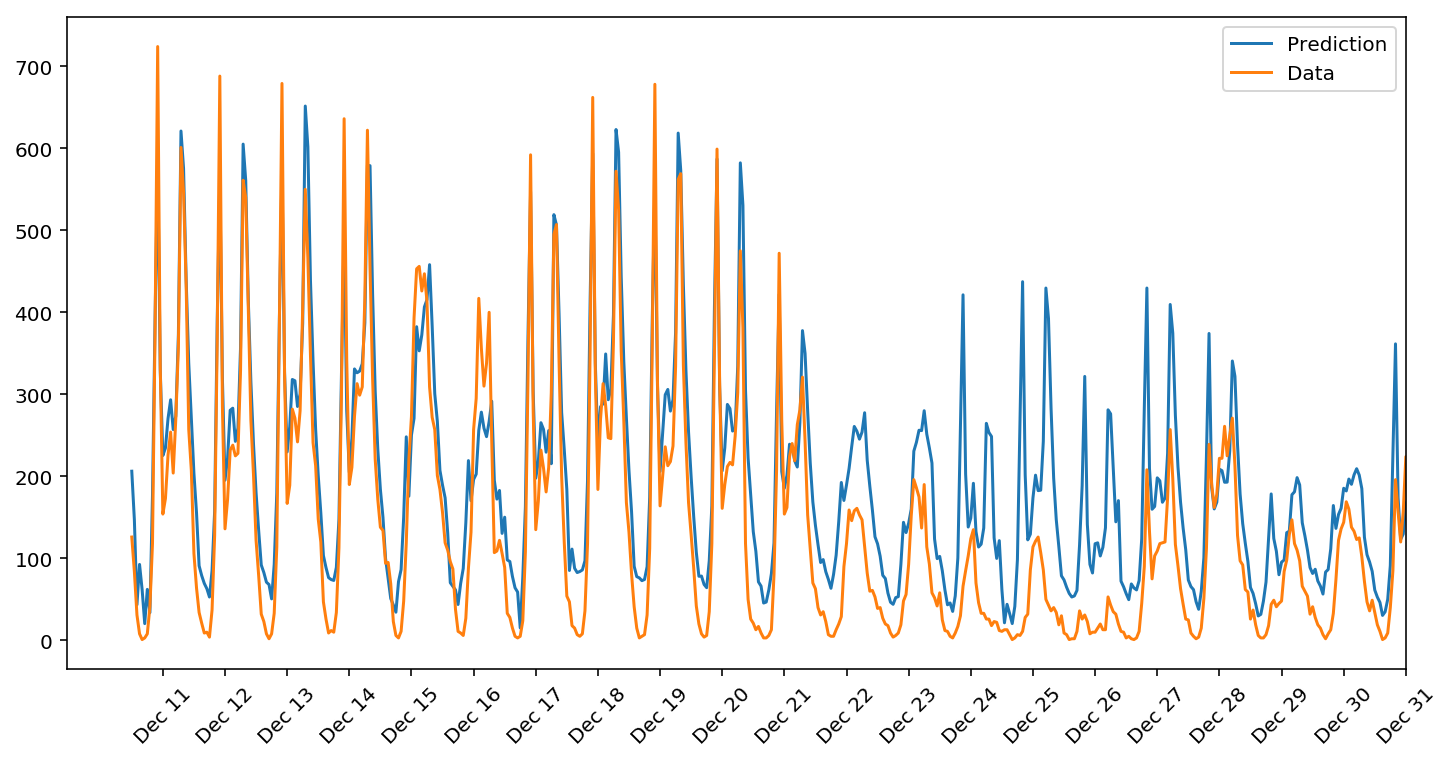

In [173]:
rides = rides_original
rides = pd.merge(rides, df_hlday, left_on='dteday', right_on='dates', how='left')
rides['holiday_name'].fillna('Nil',inplace=True)



dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday', 'holiday_name']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'dates', 'holiday_name']
data = rides.drop(fields_to_drop, axis=1)

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
val_features, val_targets = features.drop(split), targets.drop(split)


### Set the hyperparameters here ###
# epochs = 2000
# learning_rate = 0.005
# hidden_nodes = 50
# output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Validation loss: {:.4f}'.format(val_loss))

fig, ax = plt.subplots(figsize=(12,6))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

#### Add holiday & day (dummize) as feature

Training loss: 1.9990
Validation loss: 2.1259
Training loss: 0.3138
Validation loss: 0.3026
Training loss: 0.3098
Validation loss: 0.3001
Training loss: 0.3000
Validation loss: 0.2958
Training loss: 0.2725
Validation loss: 0.2642
Training loss: 0.2544
Validation loss: 0.2513
Training loss: 0.2320
Validation loss: 0.2306
Training loss: 0.2142
Validation loss: 0.2145
Training loss: 0.1874
Validation loss: 0.1887
Training loss: 0.1613
Validation loss: 0.1649


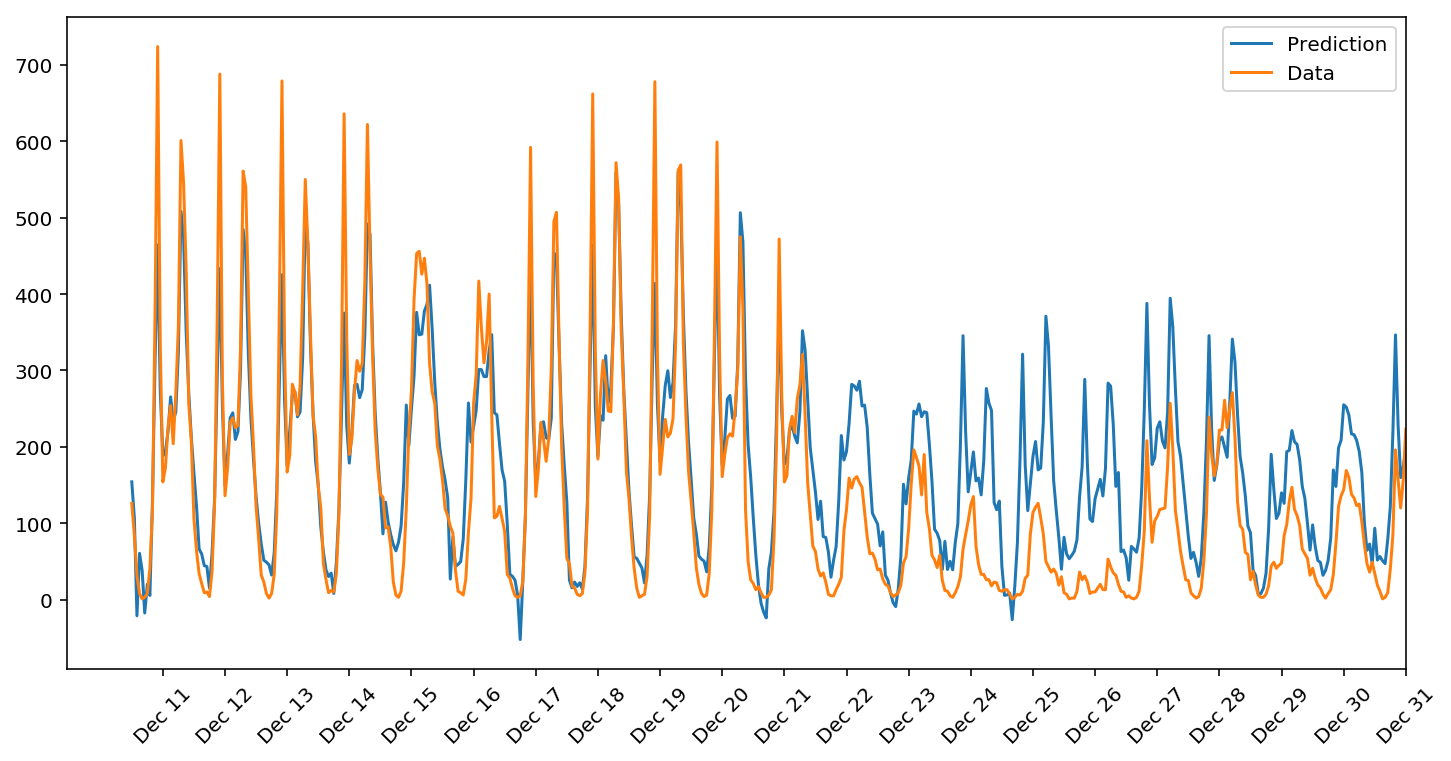

In [174]:
rides = rides_original
rides = pd.merge(rides, df_hlday, left_on='dteday', right_on='dates', how='left')
rides['holiday_name'].fillna('Nil',inplace=True)
rides['day'] =  rides['dteday'].apply(lambda x: pd.datetime.strptime(x,'%Y-%m-%d').day)



dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday', 'holiday_name', 'day']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'dates', 'holiday_name', 'day']
data = rides.drop(fields_to_drop, axis=1)

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
val_features, val_targets = features.drop(split), targets.drop(split)


### Set the hyperparameters here ###
# epochs = 2000
# learning_rate = 0.005
# hidden_nodes = 50
# output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Validation loss: {:.4f}'.format(val_loss))

fig, ax = plt.subplots(figsize=(12,6))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# Wrong Code

In [175]:
# previously wrong code
# class NeuralNetwork:
#     def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
#         # Set number of nodes in input, hidden and output layers.
#         self.input_nodes = input_nodes
#         self.hidden_nodes = hidden_nodes
#         self.output_nodes = output_nodes

#         # Initialize weights
#         self.weights_input_to_hidden = np.random.normal(loc=0.0, scale=self.hidden_nodes**-0.5, 
#                                                 size=(self.hidden_nodes, self.input_nodes))
# #         print('self.weights_input_to_hidden: ' + str(self.weights_input_to_hidden.shape))
    
#         self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
#                                                 (self.output_nodes, self.hidden_nodes))
# #         print('self.weights_hidden_to_output: ' + str(self.weights_hidden_to_output.shape))
        
#         self.learning_rate = learning_rate
        
#         #### Set this to your implemented sigmoid function ####
#         # TODO: Activation function is the sigmoid function
#         self.activation_function = lambda x: 1.0/(1 + np.exp(-x))
    
#     def train(self, inputs_list, targets_list):
#         # Convert inputs list to 2d array
#         inputs = np.array(inputs_list, ndmin=2).T
# #         print('inputs: ' + str(inputs.shape))
#         targets = np.array(targets_list, ndmin = 2).T
# #         print('targets: ' + str(targets.shape))
        
#         #### Implement the forward pass here ####
#         ### Forward pass ###
#         # TODO: Hidden layer
#         hidden_inputs = np.dot( self.weights_input_to_hidden, inputs) # signals into hidden layer
# #         print('hidden_inputs: ' + str(hidden_inputs.shape))
#         hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
# #         print('hidden_outputs: ' + str(hidden_outputs.shape))
        
#         # TODO: Output layer
#         final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
# #         print('final_inputs: ' + str(final_inputs.shape))
#         final_outputs = final_inputs # signals from final output layer
        
#         #### Implement the backward pass here ####
#         ### Backward pass ###
        
#         # TODO: Output error
#         output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
#         output_grad = output_errors * 1
        
#         # TODO: Backpropagated error
#         hidden_errors = np.dot(output_grad,self.weights_hidden_to_output)   # errors propagated to the hidden layer
# #         print('hidden_errors: ' + str(hidden_errors.shape))
#         hidden_grad =  np.dot(inputs,hidden_errors).T #* hidden_inputs* (1-hidden_inputs)   # hidden layer gradients
# #         print('hidden_grad: ' + str(hidden_grad.shape))
        
#         # TODO: Update the weights
#         self.weights_hidden_to_output += self.learning_rate * output_grad /self.input_nodes # update hidden-to-output weights with gradient descent step
# #         print('self.weights_hidden_to_output: ' + str(self.weights_hidden_to_output) + str(self.weights_hidden_to_output.shape))
#         self.weights_input_to_hidden += self.learning_rate * hidden_grad /self.input_nodes  # update input-to-hidden weights with gradient descent step
# #         print('self.weights_input_to_hidden: '  + str(self.weights_input_to_hidden) + str(self.weights_input_to_hidden.shape))
        
#     def run(self, inputs_list):
#         # Run a forward pass through the network
#         inputs = np.array(inputs_list, ndmin=2).T
        
#         #### Implement the forward pass here ####
#         # TODO: Hidden layer
#         hidden_inputs = np.dot(self.weights_input_to_hidden,inputs) # signals into hidden layer
#         hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
#         # TODO: Output layer
#         final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
#         final_outputs = final_inputs # signals from final output layer
        
#         return final_outputs